In [100]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
df_segmentation = pd.read_csv("segmentation data.csv", index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.shape

(2000, 7)

In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [7]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<AxesSubplot:>

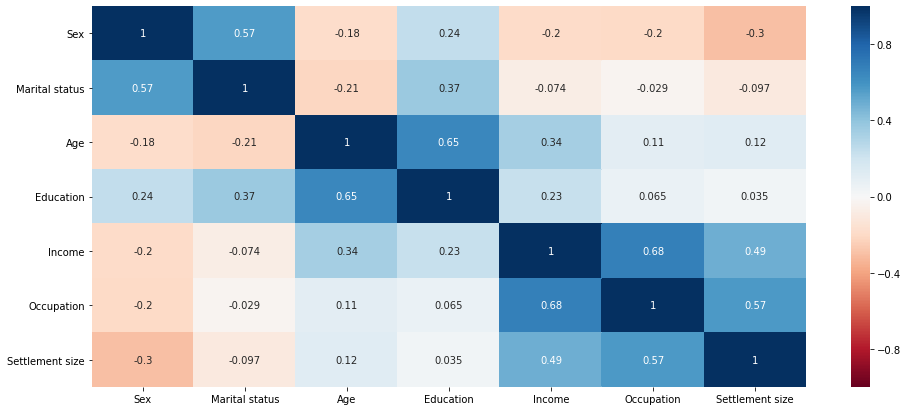

In [8]:
plt.figure(figsize=(16,7))
sns.heatmap(df_segmentation.corr(), annot=True, cmap="RdBu",vmax=1,vmin=-1)

In [9]:
scaler = StandardScaler()

In [10]:
segmentation_std = scaler.fit_transform(df_segmentation)

## HIERARCHICAL CLUSTERING 

In [12]:
hier_clus = linkage(segmentation_std,method='ward')

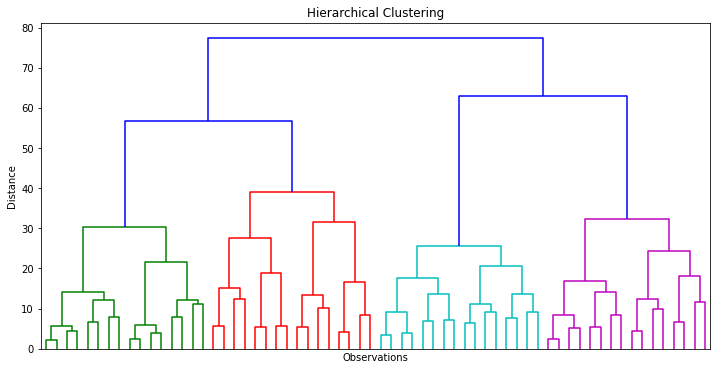

In [17]:
plt.figure(figsize=(12,6))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clus,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5)
plt.show()

## K-Means Clustering 

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)
    

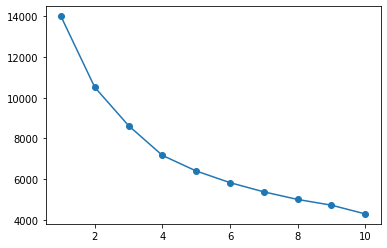

In [21]:
plt.plot(range(1,11),wcss,marker='o')

In [22]:
kmeans = KMeans(n_clusters=4, init = 'k-means++',random_state=42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [23]:
df_seg_kmeans = df_segmentation.copy()
df_seg_kmeans['cluster'] = kmeans.labels_

In [25]:
df_seg_kmeans['cluster'].value_counts().sort_index()

0    263
1    462
2    705
3    570
Name: cluster, dtype: int64

In [26]:
df_seg_analysis = df_seg_kmeans.groupby('cluster').mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [28]:
df_seg_analysis['n_obs'] = df_seg_kmeans[['Sex','cluster']].groupby('cluster').count()

In [29]:
df_seg_analysis['n_prop'] = df_seg_analysis['n_obs'] / df_seg_analysis['n_obs'].sum()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,n_prop
cluster,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [31]:
df_seg_analysis = df_seg_analysis.rename({0:'well-off',
                        1:'fewer-opportunities',
                       2: 'standard',
                       3:'career-focused'})

In [32]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,n_prop
cluster,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [33]:
df_seg_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [34]:
df_seg_kmeans['cluster'] = df_seg_kmeans['cluster'].map({0:'well-off',
                                                        1:'fewer-opportunities',
                                                       2: 'standard',
                                                       3:'career-focused'}) 

In [35]:
df_seg_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,well-off
100000002,1,1,22,1,150773,1,2,standard
100000003,0,0,49,1,89210,0,0,fewer-opportunities
100000004,0,0,45,1,171565,1,1,career-focused
100000005,0,0,53,1,149031,1,1,career-focused


<AxesSubplot:xlabel='Age', ylabel='Income'>

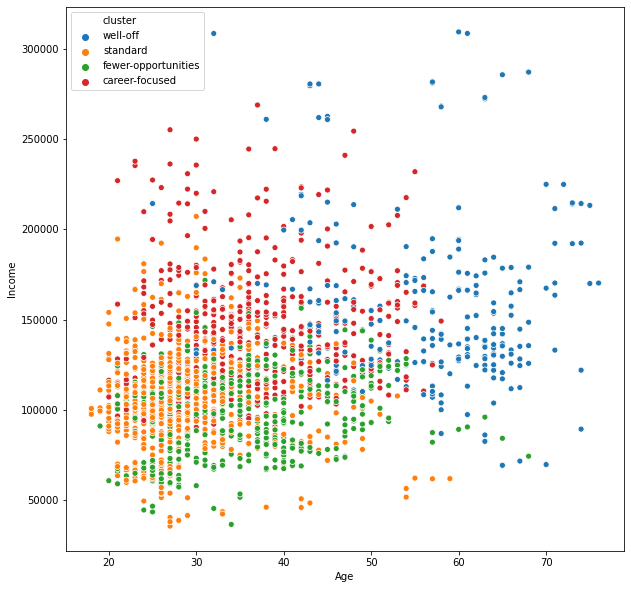

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_seg_kmeans['Age'],df_seg_kmeans['Income'],hue=df_seg_kmeans['cluster'])

## PCA

In [39]:
pca = PCA()

In [40]:
pca.fit(segmentation_std)

PCA()

In [43]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

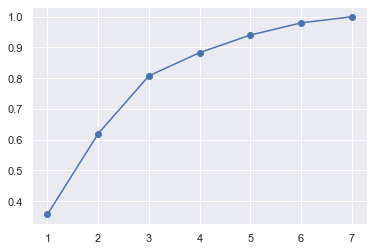

In [48]:
sns.set()
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker='o')

In [49]:
pca = PCA(n_components=3)

In [50]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [51]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [55]:
scores_pca = pca.transform(segmentation_std)

In [58]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

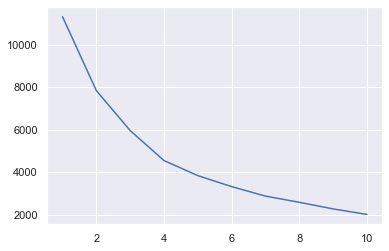

In [59]:
plt.plot(range(1,11),wcss)

In [62]:
kmeans = KMeans(n_clusters=4,init='k-means++')

In [63]:
kmeans.fit(scores_pca)

KMeans(n_clusters=4)

In [89]:
df_seg_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_seg_pca_kmeans.columns.values[-3:] = ['Compnent1','Compnent2','Compnent3']
df_seg_pca_kmeans['cluster'] = kmeans.labels_

In [90]:
df_seg_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Compnent1,Compnent2,Compnent3,cluster
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [92]:
df_seg_pca_kmeans_analysis = df_seg_pca_kmeans.groupby('cluster').mean()

In [93]:
df_seg_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Compnent1,Compnent2,Compnent3
cluster,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


<AxesSubplot:xlabel='Compnent1', ylabel='Compnent2'>

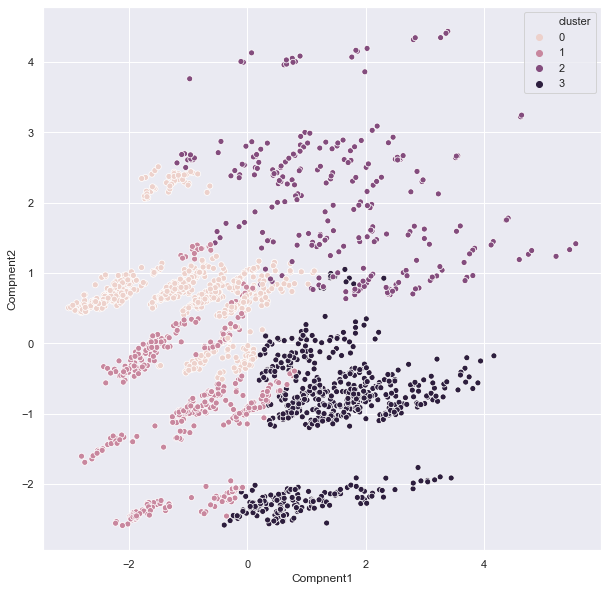

In [99]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_seg_pca_kmeans['Compnent1'],df_seg_pca_kmeans['Compnent2'],hue=df_seg_pca_kmeans['cluster'])

In [101]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [102]:
pickle.dump(kmeans,open('kmeans_pca.pickle','wb'))

In [103]:
pickle.dump(pca,open('pca.pickle','wb'))

# PURCHASE ANALYTICS 

In [104]:
df_purchase = pd.read_csv("purchase data.csv")

In [106]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [108]:
df_purchase.shape

(58693, 24)

In [109]:
df_purchase.isna().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64